<a href="https://colab.research.google.com/github/ouissem11/App-pratique/blob/master/9-13/4eme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Importer les packages
import pandas as pd
import re

In [44]:
#importation des bases de données
df=pd.read_csv('/content/ProjetsComplet.csv')
df.columns

Index(['Unnamed: 0', 'Finess', 'Nom de l'établissement', 'NomInvestigateur',
       'PrénomInvestigateur', 'TitreProjet', 'NuméroProjet', 'Acronyme',
       'MontantAccordé', 'Année', 'Type', 'Projet'],
      dtype='object')

In [45]:
df

,Unnamed: 0,Finess,Nom de l'établissement,NomInvestigateur,PrénomInvestigateur,TitreProjet,NuméroProjet,Acronyme,MontantAccordé,Année,Type,Projet
0,0,490000031,CHU D'ANGERS,ABRAHAM,Pierre,Mesure de l'index de pression systolique de ch...,201,NaN,156091.0,2012,I,PHRC
1,1,130786049,APHM,ALBANESE,Jacques,Intérêt pronostique de la balance des activité...,242,NaN,110000.0,2012,I,PHRC
2,2,750712184,ASSISTANCE PUBLIQUE AP-HP,ANDREELI,Fabrizio,Disparition du diabète de type 2 après chirurg...,101,NaN,200000.0,2012,I,PHRC
3,3,750712184,ASSISTANCE PUBLIQUE AP-HP,ANGOULVANT,Francois,Diminution du recours aux urgences par l'éduca...,78,D-Fi,112000.0,2012,I,PHRC
4,4,290000017,CHRU DE BREST,ARBAB-CHIRANI,Réza,Traitement des dents immatures nécrosées post-...,205,NaN,60836.0,2012,I,PHRC
...,...,...,...,...,...,...,...,...,...,...,...,...
2943,8,750712184,ASSISTANCE PUBLIQUE AP-HP,BLANCHARD/DJADI-PRAT,Anne/Juliette,Réprimer le dysmétabolisme épithélial pour tra...,PRTS-21-0009,PROTECT-FI,415822,2021,s,PRT
2944,9,370000481,CHRU DE TOURS,BONNET-BRILHAULT,Frédérique,Outil standardisé d'oculo-pupillométrie pour l...,PRTS-21-0010,SIRCUS,307134.6,2021,s,PRT
2945,10,750712184,ASSISTANCE PUBLIQUE AP-HP,DEGOS,Vincent,Effets de l’administration intraveineuse répét...,PRTS-21-0011,TRAUMACELL,838 426 €#,2021,s,PRT
2946,11,750712184,ASSISTANCE PUBLIQUE AP-HP,FLOUZAT-LACHANIETTE,Charles-Henri,Développement d’un marteau instrumené pour l’e...,PRTS-21-0012,OrthoMat,324 700 €¤,2021,s,PRT


In [46]:
df.columns = ["Unnamed: 0","Finess","Nomdeletablissement","NomInvestigateur","PrenomInvestigateur","TitreProjet","NumeroProjet","Acronyme","MontantAccorde","Annee","Type",
"Projet"]

In [47]:
df=df.loc[:,['Annee', 'MontantAccorde','NomInvestigateur','Projet']]
df

,Annee,MontantAccorde,NomInvestigateur,Projet
0,2012,156091.0,ABRAHAM,PHRC
1,2012,110000.0,ALBANESE,PHRC
2,2012,200000.0,ANDREELI,PHRC
3,2012,112000.0,ANGOULVANT,PHRC
4,2012,60836.0,ARBAB-CHIRANI,PHRC
...,...,...,...,...
2943,2021,415822,BLANCHARD/DJADI-PRAT,PRT
2944,2021,307134.6,BONNET-BRILHAULT,PRT
2945,2021,838 426 €#,DEGOS,PRT
2946,2021,324 700 €¤,FLOUZAT-LACHANIETTE,PRT


In [ ]:
import re
for index, row in df.iterrows():
  mt = row['MontantAccorde']
  if mt =='*': 
    mt=0
  if type (mt) ==str:
    print(mt)
    mt=re.sub('[^A-Za-z0-9]+','',mt)
    mt=int(mt)
    df.loc[index,'MontantAccordé'] = mt
    df=df
    df.loc[len(df.loc[:, 'MontantAccordé'])-3,'MontantAccordé']=838426
    df.loc[len(df.loc[:, 'MontantAccordé'])-2,'MontantAccordé']=324700
    df.loc[len(df.loc[:, 'MontantAccordé'])-1,'MontantAccordé']=224389

In [49]:
df['MontantAccordé']= df['MontantAccordé'].astype('float')

In [50]:
df=df[df.Annee>2016]
df

,Annee,MontantAccorde,NomInvestigateur,Projet,MontantAccordé
1213,2017,250471,AIRINEI,PHRC,250471.0
1214,2017,295391,ALCAIX,PHRC,295391.0
1215,2017,213343,BAL,PHRC,213343.0
1216,2017,64721,BANNIER-BRATICEVIC,PHRC,64721.0
1217,2017,182901,BAR,PHRC,182901.0
...,...,...,...,...,...
2943,2021,415822,BLANCHARD/DJADI-PRAT,PRT,415822.0
2944,2021,307134.6,BONNET-BRILHAULT,PRT,3071346.0
2945,2021,838 426 €#,DEGOS,PRT,838426.0
2946,2021,324 700 €¤,FLOUZAT-LACHANIETTE,PRT,324700.0


In [ ]:
for index, row in df.iterrows():
  mt = row['MontantAccorde']
  if mt =='*': 
    mt=0
  if type (mt) ==str:
    print(mt)
    mt=re.sub('[^A-Za-z0-9]+','',mt)
    mt=int(mt)
    df.loc[index,'MontantAccordé'] = mt
    df=df
    df.loc[len(df.loc[:, 'MontantAccorde'])-3,'MontantAccorde']=838426
    df.loc[len(df.loc[:, 'MontantAccorde'])-2,'MontantAccorde']=324700
    df.loc[len(df.loc[:, 'MontantAccorde'])-1,'MontantAccorde']=224389

In [52]:
df=df.replace('\€#','',regex=True)
df=df.replace('\€¤','',regex=True)
df=df.replace('\*','',regex=True)
df=df.replace('\#','',regex=True)

In [53]:
df

,Annee,MontantAccorde,NomInvestigateur,Projet,MontantAccordé
1213,2017,250471,AIRINEI,PHRC,250471.0
1214,2017,295391,ALCAIX,PHRC,295391.0
1215,2017,213343,BAL,PHRC,213343.0
1216,2017,64721,BANNIER-BRATICEVIC,PHRC,64721.0
1217,2017,182901,BAR,PHRC,182901.0
...,...,...,...,...,...
2943,2021,415822,BLANCHARD/DJADI-PRAT,PRT,415822.0
2944,2021,307134.6,BONNET-BRILHAULT,PRT,3071346.0
2945,2021,838 426,DEGOS,PRT,838426.0
2946,2021,324 700,FLOUZAT-LACHANIETTE,PRT,324700.0


In [54]:
df.dtypes

Annee                 int64
MontantAccorde       object
NomInvestigateur     object
Projet               object
MontantAccordé      float64
dtype: object

In [55]:
df=df.groupby(['NomInvestigateur']).sum()['MontantAccordé']

In [56]:
df= df.reset_index()

In [57]:
df

,NomInvestigateur,MontantAccordé
0,ADES,1169056.0
1,ADNET,390972.0
2,AIRINEI,250471.0
3,ALADJIDI,2056872.0
4,ALBERT,196804.0
...,...,...
1117,ZIELESKIEWICZ,131534.0
1118,ZINZONI,4898620.0
1119,ZOGHEIB,133000.0
1120,ZOULIM,2861520.0


In [58]:
df=df.sort_values('MontantAccordé', ascending = False).head(5)
df

,NomInvestigateur,MontantAccordé
936,RODRIGUES,360675435.0
431,FRAISSE,259929945.0
76,BEAUMONT,202164252.0
40,BACHY,128149366.0
830,PALUSSIERE,76952306.0


In [59]:
import plotly.express as px


In [60]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

In [61]:

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf

In [62]:
df['MontantAccordé']= df['MontantAccordé'].astype('float')

In [63]:
%matplotlib inline

In [64]:
import matplotlib.pyplot as plt

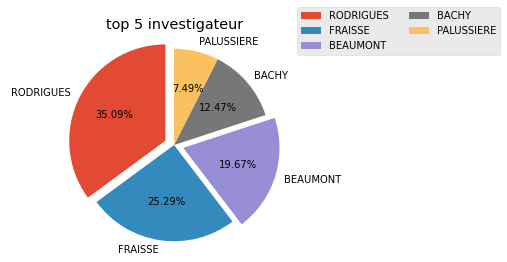

In [70]:

plt.style.use('ggplot')
plt.title('top 5 investigateur')
plt.pie(x=df['MontantAccordé'], labels=df['NomInvestigateur'], autopct='%.2f%%', explode = (0.1, 0, 0.1, 0, 0),
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(bbox_to_anchor =(0.85, 1.15), ncol = 2)
plt.show()